Using the `nycflights13` package/data, which three airlines performed the most flights in 2013.

Hints:  
- The `airlines` table provides the name of each airline
- Each row in the `flights` table represents one flight
- Use `group_by`, `summarize`,  and `arrange` 

In [1]:
library(nycflights13)
library(tidyverse)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Re-create the following figure:

(*Hint: use* `forcats` *to lump and reorder by number of flights*)

<img src="figs/flights_bar.png" style="width: 600px;"/>

In [3]:
head(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [6]:
head(airlines)

carrier,name
<chr>,<chr>
9E,Endeavor Air Inc.
AA,American Airlines Inc.
AS,Alaska Airlines Inc.
B6,JetBlue Airways
DL,Delta Air Lines Inc.
EV,ExpressJet Airlines Inc.


In [13]:
final_df = airlines %>% 
    right_join(flights) #want everything in the airlines df
head(final_df)

Joining, by = "carrier"



carrier,name,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
9E,Endeavor Air Inc.,2013,1,1,810,810,0,1048,1037,11,3538,N915XJ,JFK,MSP,189,1029,8,10,2013-01-01 08:00:00
9E,Endeavor Air Inc.,2013,1,1,1451,1500,-9,1634,1636,-2,4105,N8444F,JFK,IAD,57,228,15,0,2013-01-01 15:00:00
9E,Endeavor Air Inc.,2013,1,1,1452,1455,-3,1637,1639,-2,3295,N920XJ,JFK,BUF,68,301,14,55,2013-01-01 14:00:00
9E,Endeavor Air Inc.,2013,1,1,1454,1500,-6,1635,1636,-1,3843,N8409N,JFK,SYR,57,209,15,0,2013-01-01 15:00:00
9E,Endeavor Air Inc.,2013,1,1,1507,1515,-8,1651,1656,-5,3792,N8631E,JFK,ROC,66,264,15,15,2013-01-01 15:00:00
9E,Endeavor Air Inc.,2013,1,1,1530,1530,0,1650,1655,-5,3369,N913XJ,JFK,BWI,40,184,15,30,2013-01-01 15:00:00


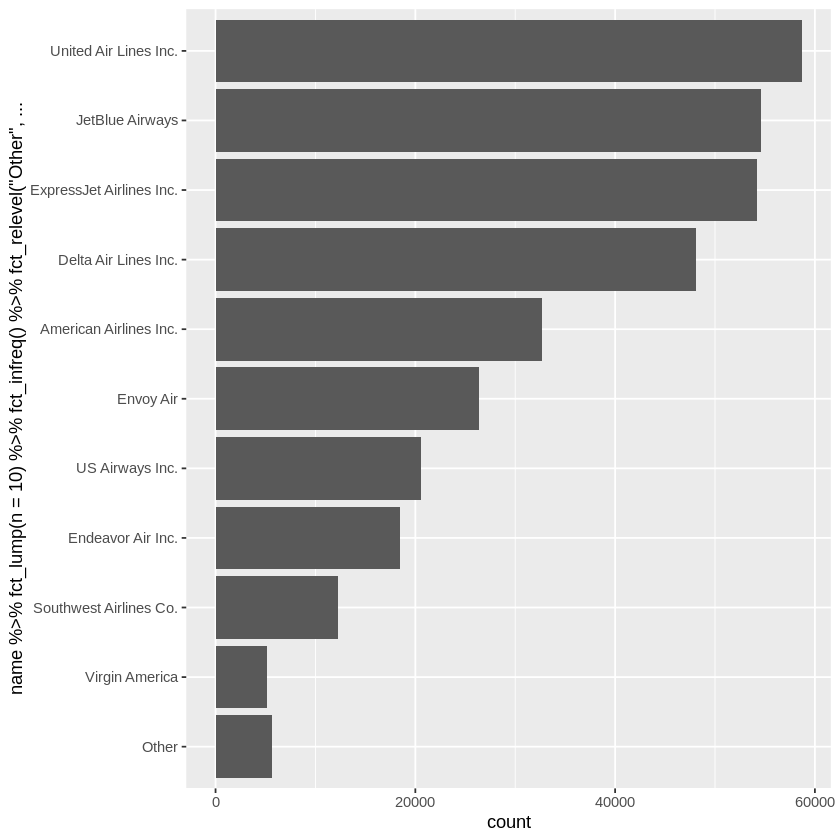

In [26]:
final_df$name = factor(final_df$name)
ggplot(data = final_df) + 
  geom_bar(aes(y = name %>% 
       fct_lump(n = 10) %>%
       fct_infreq() %>% 
       fct_relevel('Other', after = Inf) %>% #removes other category from levels
       fct_rev()))